In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('conversion_data.csv')

In [4]:
data.head(3)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0


In [5]:
data['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [6]:
print(data.loc[data['converted'] == 1].describe().transpose())
print(data.loc[data['converted'] == 0].describe().T)
print(data.describe().T)

                       count       mean       std   min   25%   50%   75%  \
age                  10200.0  26.546765  7.051849  17.0  21.0  25.0  31.0   
new_user             10200.0   0.297941  0.457376   0.0   0.0   0.0   1.0   
total_pages_visited  10200.0  14.553529  3.963392   2.0  12.0  14.0  17.0   
converted            10200.0   1.000000  0.000000   1.0   1.0   1.0   1.0   

                       max  
age                  123.0  
new_user               1.0  
total_pages_visited   29.0  
converted              1.0  
                        count       mean       std   min   25%   50%   75%  \
age                  306000.0  30.703961  8.275779  17.0  24.0  30.0  36.0   
new_user             306000.0   0.698382  0.458961   0.0   0.0   1.0   1.0   
total_pages_visited  306000.0   4.550281  2.789910   1.0   2.0   4.0   6.0   
converted            306000.0   0.000000  0.000000   0.0   0.0   0.0   0.0   

                      max  
age                  79.0  
new_user              

In [7]:
data['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [8]:
data['age'].sort_values(ascending=False).head(5)

90928     123
295581    111
265167     79
192644     77
154217     73
Name: age, dtype: int64

These two extreme ages are singular instances, so drop their rows from the data.

In [9]:
data[data['age'].isin([111, 123])]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [10]:
data = data.drop(data[data['age'].isin([111, 123])].index)
data = data.reset_index(drop=True)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

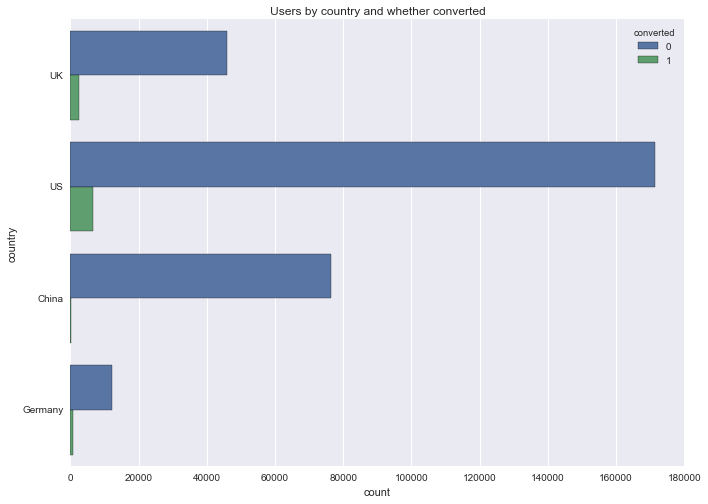

In [12]:
plt.figure()
plt.figure(figsize=(11, 8), facecolor='w', edgecolor='k')
sns.countplot(y='country', hue='converted', data=data)
plt.title('Users by country and whether converted')
plt.show()

In [93]:
mean_converted_grouped_by_country = data.groupby('country').agg({'converted': ['mean']})
print(mean_converted_grouped_by_country)

mean_converted_grouped_by_country.index.name = None
mean_converted_grouped_by_country.columns = mean_converted_grouped_by_country.columns.droplevel(0)

        converted
             mean
country          
China    0.001332
Germany  0.062428
UK       0.052612
US       0.037801


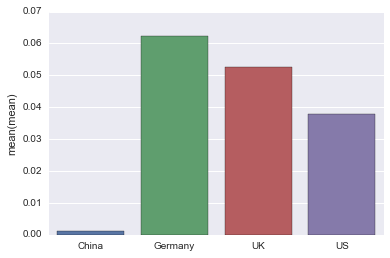

In [94]:
sns.barplot(x=mean_converted_grouped_by_country.index, y=mean_converted_grouped_by_country['mean'])

In [102]:
converted_by_total_pages_visited = data.groupby('total_pages_visited').agg({'converted': 'mean'})

In [109]:
converted_by_total_pages_visited['converted']

total_pages_visited
1     0.000000
2     0.000228
3     0.000251
4     0.000780
5     0.001570
6     0.003437
7     0.006769
8     0.015238
9     0.033067
10    0.061068
11    0.123471
12    0.244537
13    0.400825
14    0.587521
15    0.740181
16    0.871818
17    0.923077
18    0.961219
19    0.989381
20    0.997531
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: converted, dtype: float64

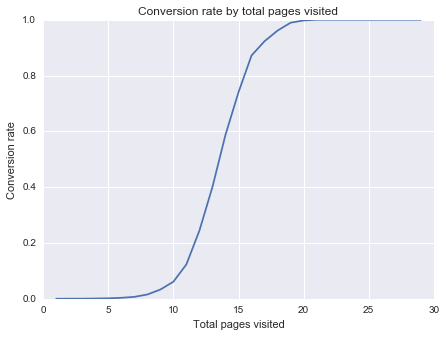

In [115]:
plt.figure(figsize=(7, 5))
plt.plot(converted_by_total_pages_visited)
plt.xlabel('Total pages visited')
plt.ylabel('Conversion rate')
plt.title('Conversion rate by total pages visited')
plt.show()


## Modeling 

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.model_selection import train_test_split

In [170]:
source_dummies = pd.get_dummies(data.loc[:, 'source'])
data[list(source_dummies.columns)] = source_dummies

In [178]:
country_dummies = pd.get_dummies(data.loc[:, 'country'])
data[list(country_dummies)] = country_dummies

In [179]:
data.head(3)

,country,age,new_user,source,total_pages_visited,converted,Ads,Direct,Seo,China,Germany,UK,US
0,UK,25,1,Ads,1,0,1,0,0,0,0,1,0
1,US,23,1,Seo,5,0,0,0,1,0,0,0,1
2,US,28,1,Seo,4,0,0,0,1,0,0,0,1


In [184]:
y = data['converted']
X = data.loc[:, ['age', 'new_user', 'total_pages_visited', 'Ads', 'Direct', 'Seo', 'China', 'Germany', 'UK', 'US']]

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

NameError: name 'train_test_split' is not defined

In [3]:
model = RandomForestClassifier(oob_score=True)
model.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [224]:
pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

total_pages_visited    0.813385
age                    0.113439
new_user               0.036999
China                  0.019572
US                     0.004129
UK                     0.002923
Ads                    0.002536
Germany                0.002387
Seo                    0.002335
Direct                 0.002297
dtype: float64

In [225]:
model.oob_score_

0.98312973207711041

/Users/andric/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/andric/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/andric/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/andric/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/andric/anaconda/envs/py35/lib/python3.5/site-packages/sklearn

Automatically created module for IPython interactive environment


/Users/andric/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


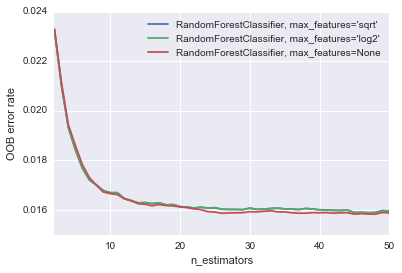

In [226]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 2
max_estimators = 50

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

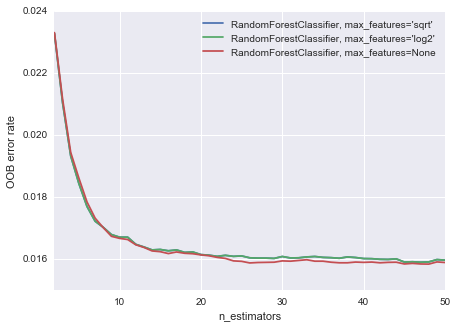

In [233]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(7, 5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()